In [1]:
# Initial Setup & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates


In [3]:
import pandas as pd

# Read in both CSV files
crypto_df = pd.read_csv("crypto_csv_with_weights.csv", index_col=False)
stock_df = pd.read_csv("stock_csv_with_weights.csv", index_col=False)

# Combine the two dataframes
combined_df = pd.concat([crypto_df, stock_df]).iloc[:,1:]
combined_df

,Date,Ticker_Close_Price,Predicted_Return,Actual_Return,Position,Strategy_Return,Cumulative_Return,Ticker,Rolling_Risk,Rolling_Average,Weight,Close_Price
0,2025-03-01 00:47:00,84171.7000,-0.000075,-0.001042,SHORT,0.001042,0.001042,BTC,NaN,NaN,NaN,NaN
1,2025-03-01 00:47:00,2229.9000,-0.000087,-0.001296,SHORT,0.001296,0.001296,ETH,NaN,NaN,NaN,NaN
2,2025-03-01 00:47:00,2.1373,-0.000017,-0.001825,SHORT,0.001825,0.001825,XRP,NaN,NaN,NaN,NaN
3,2025-03-01 00:47:00,146.5100,0.000026,-0.001638,LONG,-0.001638,-0.001638,SOL,NaN,NaN,NaN,NaN
4,2025-03-01 00:48:00,2.1334,0.000011,-0.001078,LONG,-0.001078,0.000745,XRP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61962,2025-03-31 23:58:00,NaN,-0.000007,-0.000175,SHORT,0.000175,1.200982,AAPL,0.000365,1.766623e-04,-5.134711e-01,221.1999
61963,2025-03-31 23:58:00,NaN,-0.000005,0.000555,SHORT,-0.000555,1.340513,AMZN,0.000664,-1.181722e-04,-5.264366e-02,189.1042
61964,2025-03-31 23:58:00,NaN,-0.000005,0.000574,SHORT,-0.000574,1.168618,NVDA,0.000458,-2.250520e-07,-1.685601e-07,107.5195
61965,2025-03-31 23:58:00,NaN,0.000035,0.000084,LONG,0.000084,0.927197,MSFT,0.000388,-2.236399e-04,-2.646697e-07,373.9936


In [21]:
# Define a function to compute the weighted return for a given column
def weighted_return(group, col):
    return (group['Weight'] * group[col]).sum()

# Group by the timeframe column and calculate the weighted returns for each group
portfolio_returns = combined_df.groupby("Date").apply(
    lambda x: pd.Series({
        "Portfolio_Predicted_Return": weighted_return(x, "Predicted_Return"),
        "Portfolio_Actual_Return": weighted_return(x, "Actual_Return"), 
    })
).reset_index()

# Ensure that the DataFrame is sorted by timeframe for proper cumulative calculation
portfolio_returns = portfolio_returns.sort_values(by="Date")

# Compute position based on the sign of predicted return
positions = portfolio_returns["Portfolio_Predicted_Return"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Strategy return = position * actual return
portfolio_returns["Portfolio_Strategy_Return"] = (
    positions * portfolio_returns["Portfolio_Actual_Return"]
) 

# Calculate the cumulative portfolio strategy return
# Here, we assume that returns are expressed as decimals (e.g., 0.01 for 1%)
portfolio_returns["Portfolio_Strategy_Cumulative_Return"] = (
    (1 + portfolio_returns["Portfolio_Strategy_Return"]).cumprod() - 1
) 

print(portfolio_returns)

                      Date  Portfolio_Predicted_Return  \
0      2025-03-01 00:40:00                    0.000000   
1      2025-03-01 00:42:00                    0.000000   
2      2025-03-01 00:44:00                    0.000000   
3      2025-03-01 00:46:00                    0.000000   
4      2025-03-01 00:47:00                    0.000000   
...                    ...                         ...   
44591  2025-03-31 23:54:00                    0.000016   
44592  2025-03-31 23:55:00                   -0.000045   
44593  2025-03-31 23:56:00                   -0.000026   
44594  2025-03-31 23:57:00                   -0.000041   
44595  2025-03-31 23:58:00                   -0.000018   

       Portfolio_Actual_Return  Portfolio_Strategy_Return  \
0                     0.000000                   0.000000   
1                     0.000000                   0.000000   
2                     0.000000                   0.000000   
3                     0.000000                   0.000000  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34088\1028049706.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  portfolio_returns = combined_df.groupby("Date").apply(


In [20]:
portfolio_returns

,Date,Portfolio_Predicted_Return,Portfolio_Actual_Return,Portfolio_Strategy_Return,Portfolio_Strategy_Cumulative_Return
0,2025-03-01 00:40:00,0.000000,0.000000,0.000000,0.000000
1,2025-03-01 00:42:00,0.000000,0.000000,0.000000,0.000000
2,2025-03-01 00:44:00,0.000000,0.000000,0.000000,0.000000
3,2025-03-01 00:46:00,0.000000,0.000000,0.000000,0.000000
4,2025-03-01 00:47:00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
44591,2025-03-31 23:54:00,0.000016,-0.000215,-0.000215,0.094525
44592,2025-03-31 23:55:00,-0.000045,-0.000188,0.000188,0.094319
44593,2025-03-31 23:56:00,-0.000026,-0.000039,0.000039,0.094276
44594,2025-03-31 23:57:00,-0.000041,-0.000002,0.000002,0.094274


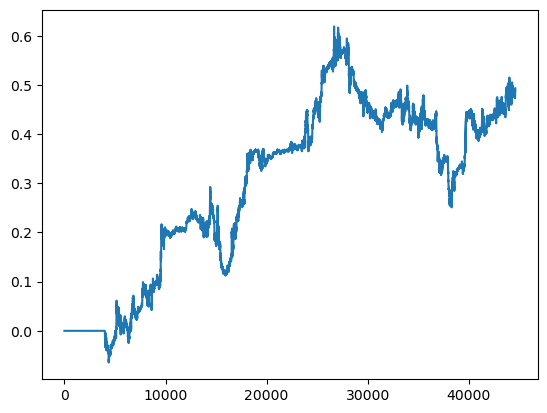

In [16]:
plt.plot(portfolio_returns['Portfolio_Strategy_Cumulative_Return'])

In [6]:
def run_sensitivity_analysis(final_df):
    """
    Perform sensitivity analysis by adjusting the predicted returns and evaluating final cumulative return.
    Works with final_df.
    """
    factors = [0.5, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5]
    results = []

    for factor in factors:
        # Adjust the predicted returns using the factor
        adjusted_predicted = final_df['Portfolio_Predicted_Return'] * factor

        # Determine position: LONG if predicted >= 0, else SHORT
        positions = np.where(adjusted_predicted >= 0, 1, -1)

        # Strategy return = actual return * position
        strategy_returns = positions * final_df['Portfolio_Actual_Return']

        # Compute cumulative return
        cumulative_returns = (1 + strategy_returns).cumprod()
        final_cum_return = cumulative_returns.iloc[-1]
        
        results.append({
            'Adjustment_Factor': factor,
            'Final_Cumulative_Return': final_cum_return
        })

    return pd.DataFrame(results)  

def run_stress_testing(final_df):
    """
    Perform stress testing by simulating market shocks on final_df.
    """

    scenarios = {
        'Crash': final_df['Portfolio_Actual_Return'] - 0.00005,  
        'Volatility_Spike': final_df['Portfolio_Actual_Return'] + np.random.normal(0, 0.00002, size=len(final_df)),
        'Prediction_Inverted': -final_df['Portfolio_Predicted_Return'],
        'Zero_Prediction': np.zeros_like(final_df['Portfolio_Predicted_Return']),
        'Normal': final_df['Portfolio_Actual_Return']
    }

    results = []

    for scenario_name, shock in scenarios.items():
        df_temp = final_df.copy()

        # Adjust predictions or actuals based on scenario
        if 'Prediction' in scenario_name or 'Zero' in scenario_name:
            df_temp['Adj_Predicted_Return'] = shock
            df_temp['Adj_Actual_Return'] = df_temp['Portfolio_Actual_Return']
        else:
            df_temp['Adj_Predicted_Return'] = df_temp['Portfolio_Predicted_Return']
            df_temp['Adj_Actual_Return'] = shock

        # Position based on adjusted prediction
        positions = np.where(df_temp['Adj_Predicted_Return'] > 0, 1, -1)

        # Strategy returns based on adjusted actual returns
        strategy_returns = positions * df_temp['Adj_Actual_Return']

        # Compute cumulative return
        cumulative_return = pd.Series(1 + strategy_returns).cumprod().iloc[-1]
        results.append((scenario_name, cumulative_return))

    return pd.DataFrame(results, columns=["Scenario", "Final_Cumulative_Return"])



In [7]:
run_sensitivity_analysis(portfolio_returns)

,Adjustment_Factor,Final_Cumulative_Return
0,0.5,1.120682
1,0.8,1.120682
2,0.9,1.120682
3,1.0,1.120682
4,1.1,1.120682
5,1.2,1.120682
6,1.5,1.120682


In [8]:
run_stress_testing(portfolio_returns)

,Scenario,Final_Cumulative_Return
0,Crash,1.885490
1,Volatility_Spike,1.114580
2,Prediction_Inverted,0.843275
3,Zero_Prediction,0.861093
4,Normal,1.120682
